## Import Library

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [103]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head(10)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450,530,5,6,2,10800000000,Belum,Utara,Standard,1-2 Mobil
6,Below Standard,Gubeng,96,60,2,1,1,390000000,Belum,Utara,Standard,1-2 Mobil
7,Premium,Gubeng,85,100,3,2,2,725000000,Belum,Utara,Standard,1-2 Mobil
8,Below Standard,Sawahan,72,120,4,1,1,775000000,Belum,Barat,Tikungan/Hook,< 1 Mobil
9,Standard,Gubeng,50,100,2,2,2,850000000,Belum,Utara,Standard,1-2 Mobil


In [104]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Tingkat/Lantai ": "Tingkat/Lantai"})
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [105]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [106]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [107]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [108]:
# drop customer id
df = df.drop('Terjual/Belum', axis=1)

## Data Transformation

In [109]:
# Bersihkan kolom 'Nama Daerah'
df['Nama Daerah'] = (
    df['Nama Daerah']
    .astype(str)                # pastikan semua string
    .str.strip()                # hapus spasi di awal/akhir
    .str.replace(r'\s+', ' ', regex=True)  # ganti spasi ganda jadi satu
)

# Cek hasil unik setelah dibersihkan
print(sorted(df['Nama Daerah'].unique())[:20])  # tampilkan 20 contoh pertama

['Anjasmoro', 'Araya', 'Asemrowo', 'Babatan', 'Babatan Pantai', 'Baratajaya', 'Bendul Merisi', 'Bratang Gede', 'Bubutan', 'Bulak Cumpat barat', 'Ciliwung', 'Citraland', 'Citraland Golf Avenue', 'Citraland Utara', 'Darmahusada', 'Darmo', 'Darmo Permai', 'Diponegoro', 'Dukuh Pakis', 'Dukuh Sutorejo']


In [110]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 2. Nominal Encoding
# Kolom kategorikal
nominal_cols = ['Nama Daerah','Area Category', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# Fit encoder
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

# Show sample
df_encoded.sample(n=5)

{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Area Category': {'Below Standard': 0,
                   'Premium': 1,
                   'Sangat Premium': 2,
                   'Standard': 3},
 'Lebar Jalan Depan Rumah (ROW)': {'1-2 Mobil': 0,
                                   '< 1 Mobil': 1,
                                   '> 2 Mobil': 2},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland Golf Avenue': 12,
                 'Citraland Utara': 13,
                 'Darmahusada': 14,
                 'Darmo': 15,
                 'Darmo Permai': 16,
                 'Diponego

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
214,3.0,67.0,60,100,2,2,2,600000000,2.0,2.0,0.0
41,3.0,71.0,180,240,5,5,2,10500000000,2.0,2.0,2.0
120,3.0,119.0,162,200,3,3,2,3000000000,3.0,2.0,0.0
132,3.0,11.0,240,300,5,4,2,4000000000,0.0,2.0,0.0
95,3.0,115.0,120,130,3,3,2,1350000000,3.0,2.0,0.0


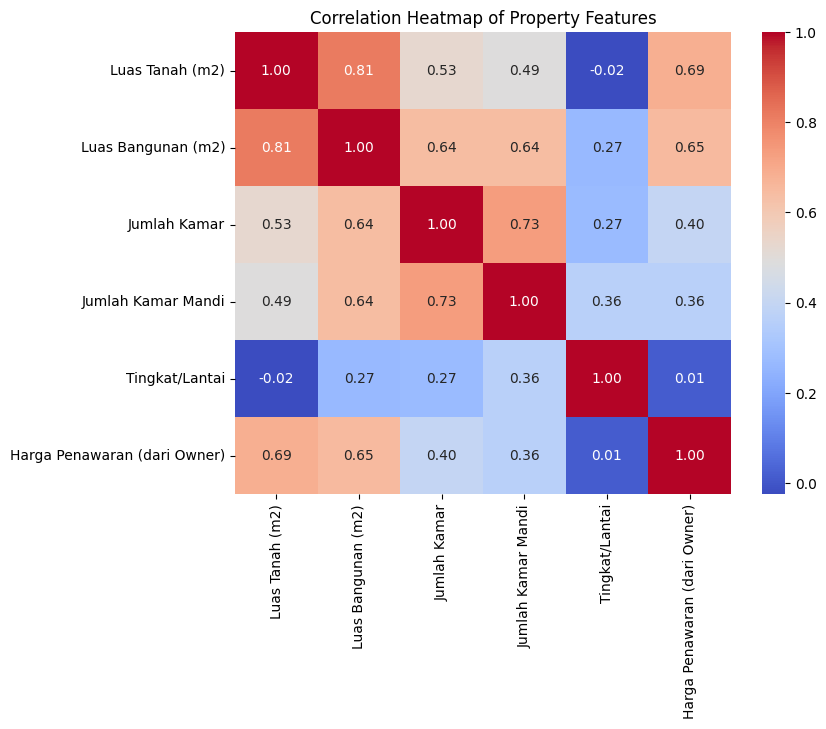

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom numerik
numeric_cols = [
    'Luas Tanah (m2)', 
    'Luas Bangunan (m2)', 
    'Jumlah Kamar', 
    'Jumlah Kamar Mandi', 
    'Tingkat/Lantai', 
    'Harga Penawaran (dari Owner)'
]

# Hitung korelasi
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Property Features')
plt.show()


Berdasarkan hasil Correlation Heatmap of Property Features, terlihat bahwa Luas Tanah (0.69) dan Luas Bangunan (0.65) memiliki korelasi positif cukup kuat terhadap Harga Penawaran, yang berarti semakin luas tanah dan bangunan, semakin tinggi pula harga properti. Selain itu, Jumlah Kamar dan Jumlah Kamar Mandi juga menunjukkan korelasi sedang terhadap harga, meskipun tidak sekuat faktor luas. Sebaliknya, Tingkat/Lantai hampir tidak memiliki hubungan dengan harga (0.01), menunjukkan bahwa jumlah lantai bukan faktor utama dalam menentukan nilai properti. Secara keseluruhan, insight ini menegaskan bahwa ukuran fisik properti menjadi penentu utama harga penawaran, sementara faktor struktural lain seperti jumlah lantai berpengaruh minimal.

C:\Users\miche\AppData\Local\Temp\ipykernel_25828\2024925379.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




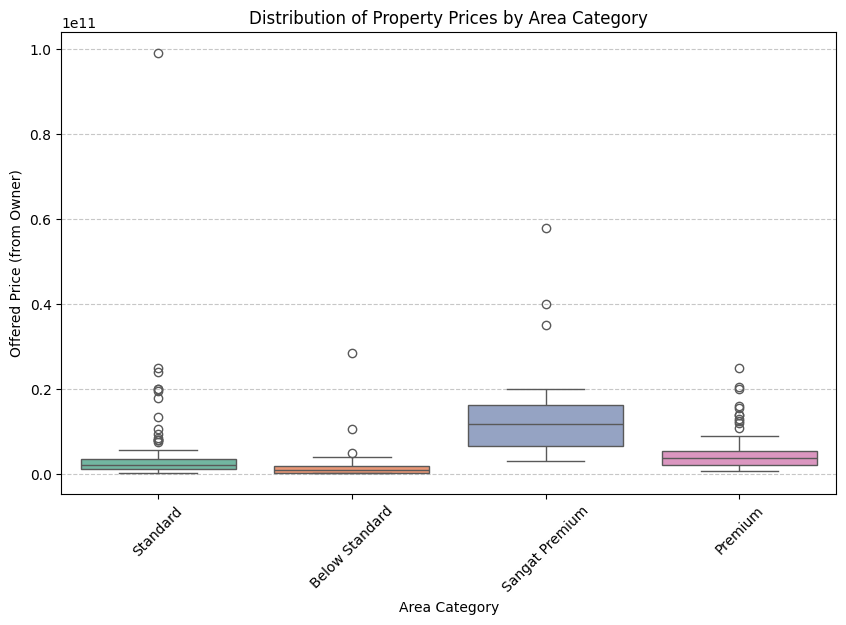

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Area Category',
    y='Harga Penawaran (dari Owner)',
    palette='Set2'
)

plt.title('Distribution of Property Prices by Area Category')
plt.xlabel('Area Category')
plt.ylabel('Offered Price (from Owner)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Boxplot tersebut menunjukkan bahwa kategori area memiliki pengaruh signifikan terhadap harga properti. Area “Sangat Premium” memiliki harga penawaran tertinggi, diikuti oleh “Premium”, sedangkan “Below Standard” memiliki harga terendah dengan rentang yang sempit. Persebaran harga pada kategori “Standard” dan “Premium” cukup bervariasi, menandakan adanya perbedaan kualitas atau ukuran properti dalam kategori yang sama. Kehadiran banyak outlier juga menunjukkan adanya beberapa properti dengan harga jauh di atas rata-rata di tiap kategori area.

In [113]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df_encoded.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Bangunan (m2)', 'Luas Tanah (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran (dari Owner)']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Bangunan (m2)', 'Luas Tanah (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran (dari Owner)'])
df_scaled.head()

,Luas Bangunan (m2),Luas Tanah (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,0.156529,0.064760,-0.168161,-0.207847,0.313723,-0.182491
1,-0.971209,-0.977457,-1.386831,-1.438941,0.313723,-0.569600
2,-0.454330,-0.282646,0.441174,0.407700,0.313723,-0.278901
3,-0.078417,-0.198276,0.441174,1.023247,0.313723,-0.230696
4,1.566201,0.610683,0.441174,1.023247,0.313723,-0.001723


In [114]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Bangunan (m2),Luas Tanah (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,8.651089e-17,2.306957e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.187359e+00,-1.056864e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.892750e-01,-6.499032e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.133623e-01,-3.198678e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.916222e-01,2.781662e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,4.385546e+00,6.620801e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

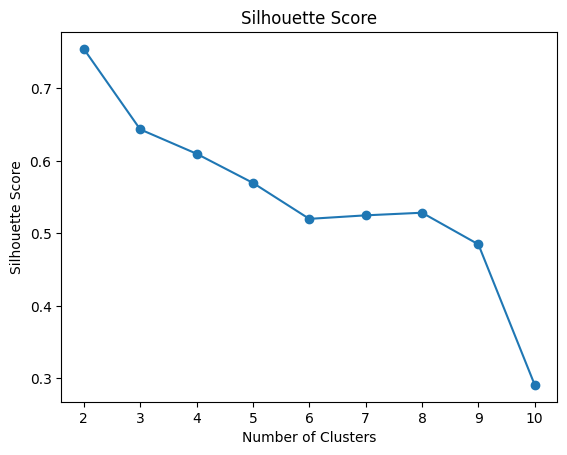

In [115]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


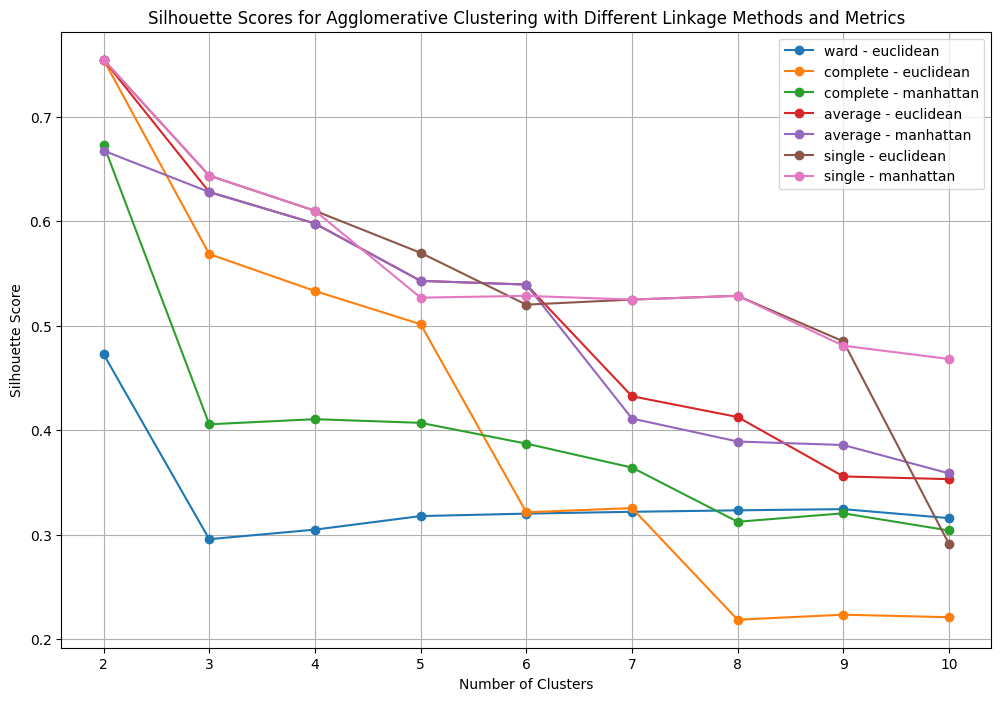

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [116]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

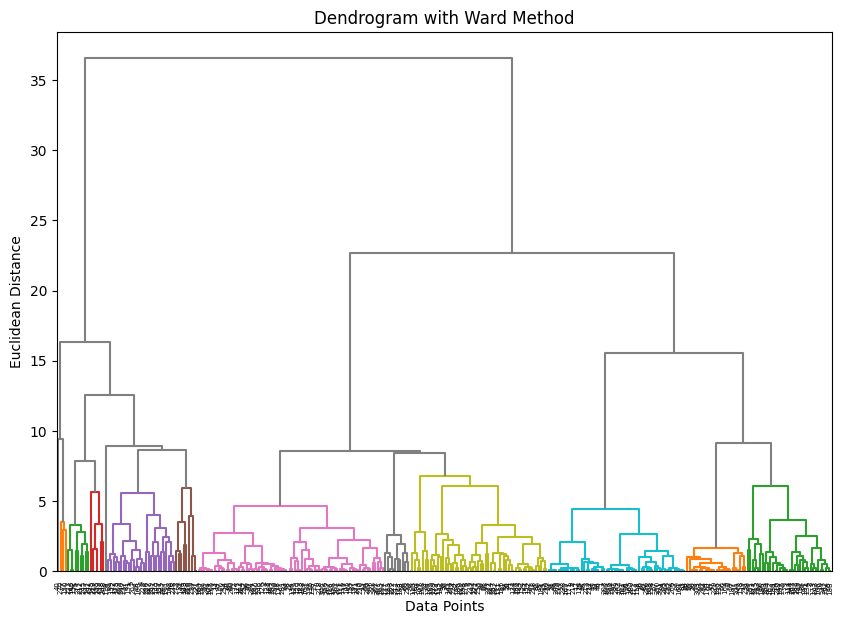

In [117]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

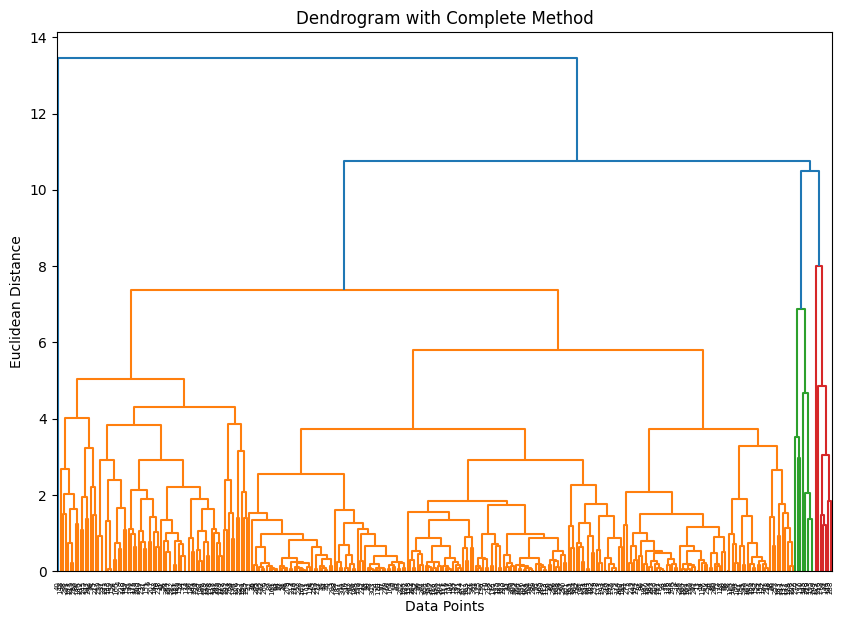

In [118]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

#### Ward Method

In [119]:
# Hierarchical Clustering using Ward linkage
agglo_ward = AgglomerativeClustering(
    n_clusters=best_n_clusters, 
    linkage='ward'
)

y_hc_ward = agglo_ward.fit_predict(df_scaled)

In [120]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


## Dendogram Visualization for Hierarchical Clustering Model

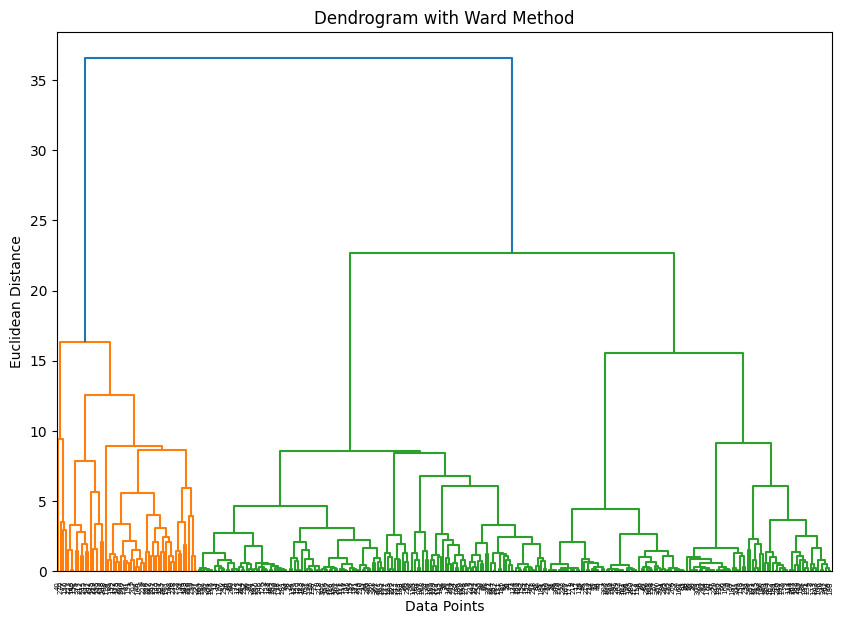

In [121]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Ward linkage (automatically uses Euclidean distance)
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


#### Complete Method

In [122]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [123]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


## Dendogram Visualization for Hierarchical Clustering Model

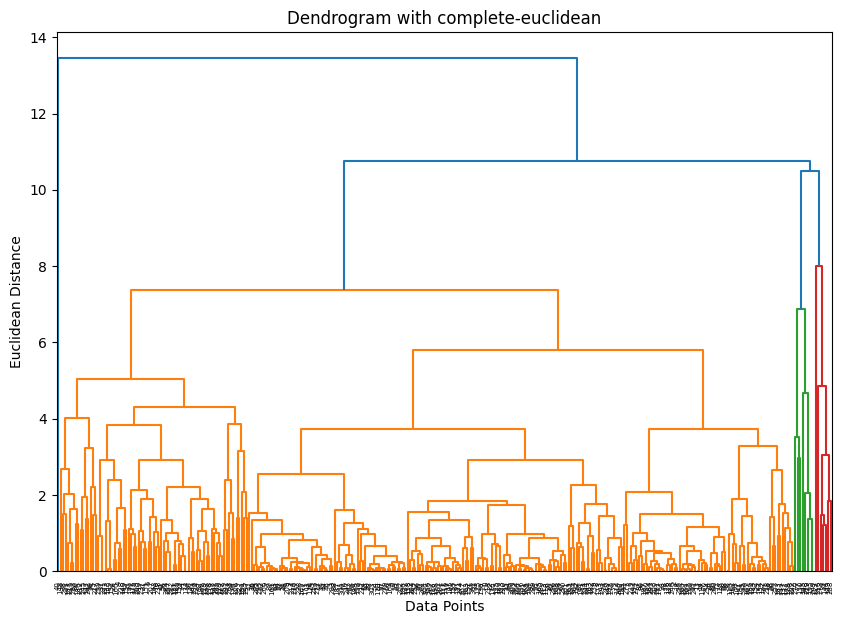

In [124]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [125]:
# Add the cluster labels to the original data
df_encoded['Agglo'] = y_hc

# Analyze the clusters with the original values
df_encoded.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,3.0,11.0,240,300,4,3,2,3500000000,3.0,2.0,0.0,0
1,0.0,97.0,30,60,2,1,2,287799000,3.0,2.0,1.0,0
2,3.0,47.0,170,170,5,4,2,2699999999,1.0,0.0,0.0,0
3,2.0,47.0,187,250,5,5,2,3100000000,3.0,2.0,0.0,0
4,1.0,47.0,350,600,5,5,2,5000000000,0.0,2.0,0.0,0


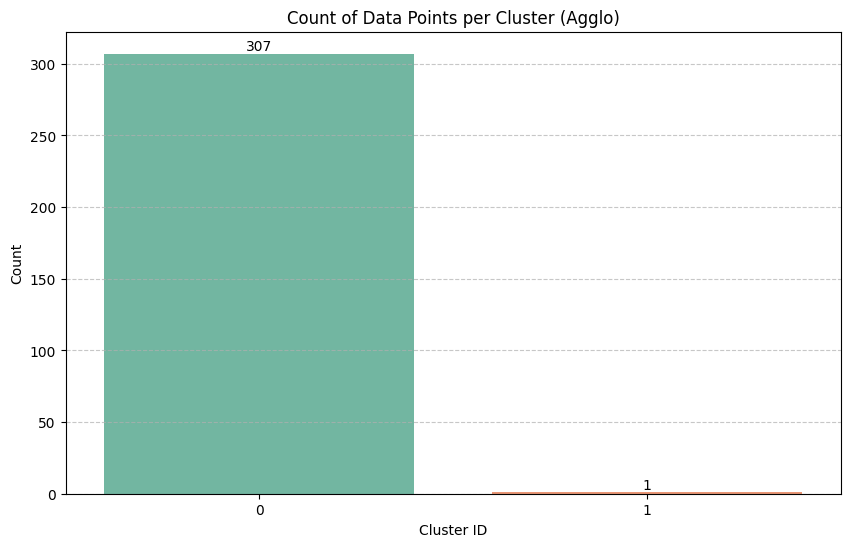

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_encoded['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

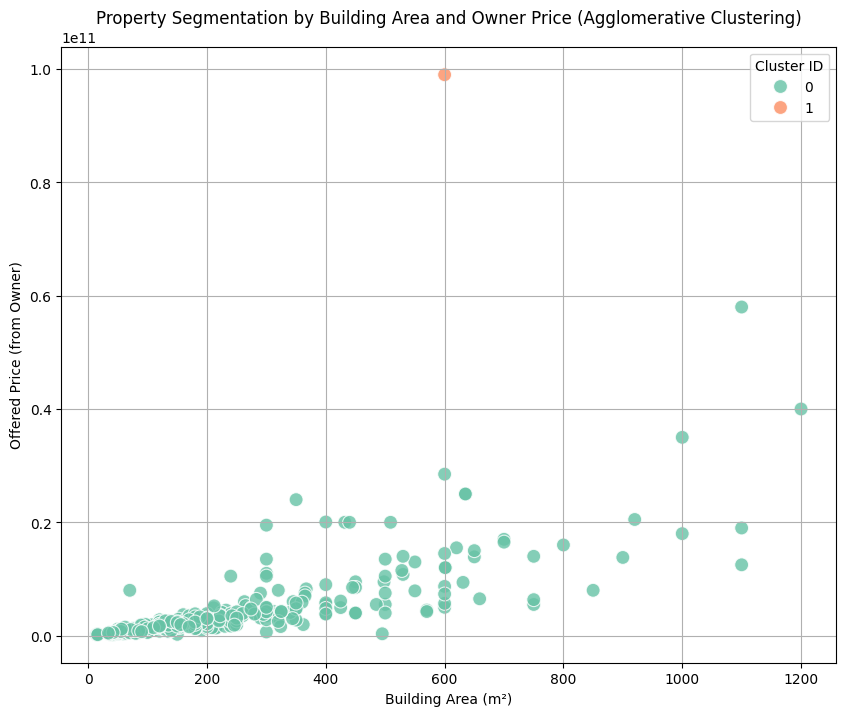

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_encoded, 
    x='Luas Bangunan (m2)', 
    y='Harga Penawaran (dari Owner)', 
    hue='Agglo', 
    palette='Set2', 
    s=100, 
    alpha=0.8
)

plt.title('Property Segmentation by Building Area and Owner Price (Agglomerative Clustering)')
plt.xlabel('Building Area (m²)')
plt.ylabel('Offered Price (from Owner)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()


In [128]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Bangunan (m2)'
y_col = 'Harga Penawaran (dari Owner)'
z_col = 'Luas Tanah (m2)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_encoded['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

## Statistical Summary for each cluster

In [129]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_encoded.groupby('Agglo').agg({
    'Area Category': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'std', 'min', 'max']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Area Category       Luas Tanah (m2)                         \
                 mode count            mean         std  min   max   
cluster                                                              
0                 3.0   307      225.736156  201.019246   14  1561   
1                 3.0     1      600.000000         NaN  600   600   

        Luas Bangunan (m2)                         ... Jumlah Kamar Mandi      \
                      mean         std  min   max  ...                min max   
cluster                                            ...                          
0               265.602606  212.655015   14  1200  ...                  1  13   
1               600.000000         NaN  600   600  ...                  5   5   

        Tingkat/Lantai                   Harga Penawaran (dari Owner)  \
                  mean       std min max                         mean   
cluster                                                                 
0             1.843648  0.506478   1   4                 4.708159e+09   
1             1.000000       NaN   1   1                 9.900000e+10   

                                                 
                  std          min          max  
cluster                                          
0        6.351742e+09    160000000  58000000000  
1                 NaN  99000000000  99000000000  

[2 rows x 26 columns]

**Cluster 0 (n=307) — Properti Umum dengan Harga Menengah dan Sebaran Luas**

Profil:
Cluster ini mencakup sebagian besar data (307 dari 308 properti). Rata-rata luas tanah 225,7 m² dan luas bangunan 265,6 m², dengan 4 kamar tidur, 3 kamar mandi, dan 2 lantai. Harga penawaran rata-rata sekitar Rp 4,7 miliar, dengan variasi tinggi (mulai dari Rp160 juta hingga Rp58 miliar). Sebagian besar properti termasuk kategori area Standard hingga Premium.

Interpretasi:
Cluster ini menggambarkan segmen pasar properti utama di Surabaya dengan karakteristik ukuran dan harga menengah. Variasi harga yang cukup tinggi menunjukkan adanya perbedaan lokasi atau kualitas bangunan meskipun berada dalam kelompok serupa.

Strategi:

- Fokuskan promosi pada pasar menengah dengan fleksibilitas harga.

- Soroti fitur bangunan (jumlah kamar, lantai) sebagai nilai jual utama.

- Optimalkan filter harga dan lokasi untuk membantu pembeli menemukan properti sesuai daya beli.

Fokus KPI: Rasio penjualan properti aktif, tingkat kunjungan listing, dan conversion rate dari minat ke pembelian.

**Cluster 1 (n=1) — Properti Premium Berharga Ekstrim**

Profil:
Cluster ini hanya berisi 1 properti unik dengan luas tanah dan bangunan masing-masing 600 m², 5 kamar tidur, 5 kamar mandi, 1 lantai, dan harga penawaran mencapai Rp 99 miliar. Properti ini berasal dari kategori area Sangat Premium.

Interpretasi:
Segmen ini merepresentasikan outlier ekstrem di pasar properti — hunian eksklusif dengan nilai jual sangat tinggi yang berbeda jauh dari mayoritas. Properti seperti ini cenderung ditujukan bagi kalangan atas dengan daya beli tinggi.

Strategi:

- Tawarkan pendekatan penjualan personal dan private viewing.

- Gunakan branding eksklusif (luxury property, high-end investment).

- Kolaborasi dengan agen properti premium dan targetkan investor atau ekspatriat.

Fokus KPI: Nilai transaksi per unit, exposure media premium, dan tingkat engagement calon pembeli kelas atas.

#### Evaluasi Metode dan Segmentasi

Hasil clustering menggunakan Agglomerative Hierarchical Clustering (complete linkage, Euclidean metric) menghasilkan 2 cluster dengan Silhouette Score 0.75, menandakan segmentasi yang kuat dan jelas.
Metode ini memberikan pemisahan bermakna antara properti umum dan properti ekstrem (outlier), di mana sebagian besar properti terkelompok homogen dalam cluster utama, sementara satu unit dengan harga dan ukuran ekstrem terpisah sendiri.

Oleh karena itu, metode complete linkage dinilai efektif untuk mendeteksi struktur hierarkis alami dan outlier ekstrem, memberikan wawasan penting dalam diferensiasi pasar properti Surabaya berdasarkan ukuran dan harga penawaran.

#### Interpretasi manajerial dan implikasi potensi bisnis

Berdasarkan hasil clustering, dapat disimpulkan bahwa pasar properti terbagi ke dalam beberapa segmen yang memiliki karakteristik berbeda, seperti kelompok dengan harga tinggi di area strategis dan kelompok dengan harga menengah hingga rendah di area pinggiran. Hal ini memberikan wawasan penting bagi manajemen untuk menyusun strategi harga yang lebih tepat sasaran serta menyesuaikan penawaran dengan preferensi masing-masing segmen. Misalnya, properti di segmen premium dapat difokuskan pada peningkatan fasilitas dan eksklusivitas, sedangkan segmen menengah ke bawah dapat diarahkan pada strategi volume penjualan dan promosi lokasi yang berkembang.